<a href="https://colab.research.google.com/github/ravi-prakash1907/Immersive-Technologies/blob/mod-3/module-3/TechComponents/code/FiniteImpulseResponse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Finite Impulse Response

Analyzing the impulse response of a Linear Filter.

In [ ]:
## libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [ ]:
# If the line below is giving you compiler errors, comment it out.
# plt.style.use(['science', 'notebook', 'grid'])
plt.style.use(['ggplot'])

frameSize = 2048

## filter
def linearFilter(x, c):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        y[n] = c * x[n]
    return y


def implementFIR(c=1/3):
  impulse = np.zeros(frameSize)
  impulse[0] = 1;

  impulseResponse = linearFilter(impulse, c)

  fig, axes = plt.subplots(1, 2, figsize=(12,4))
  ax = axes[0]
  ax.plot(impulse, 'bo-')
  ax.set_xlabel('Sample count')
  ax.set_ylabel('Amplitude')
  ax.set_ylim(-0.1, 1.1)
  ax.set_xlim(-0.5, 10)
  ax.set_title("Impulse")

  ax = axes[1]
  ax.plot(impulseResponse, 'ro-')
  ax.set_xlabel('Sample count')
  ax.set_ylim(~max([1, c])+0.1, max([1, c])+0.1)
  ax.set_xlim(-0.5, 11)
  ax.set_title("Impulse Response")

  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

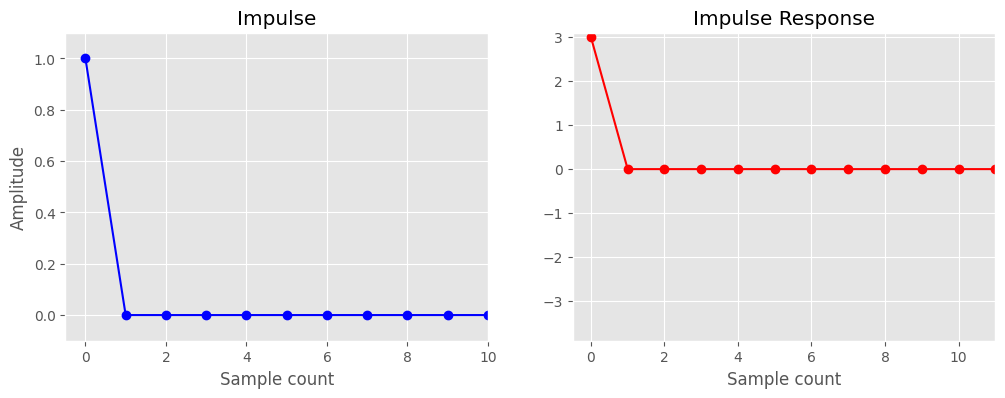

In [ ]:
implementFIR(c=3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

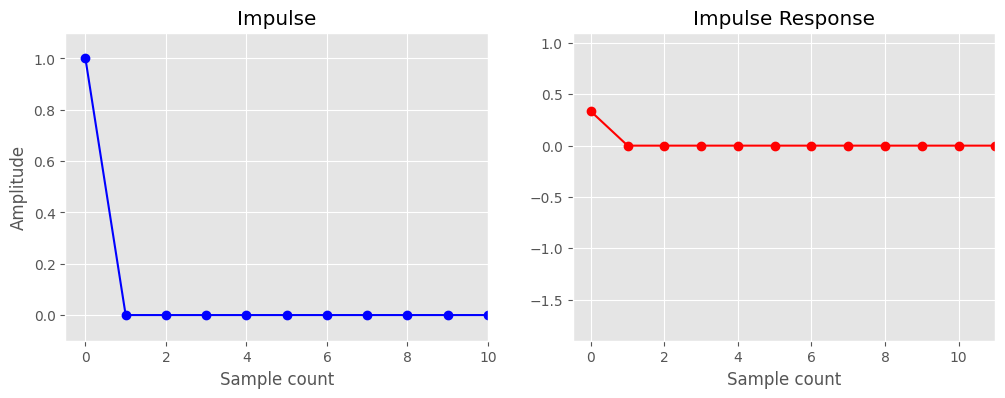

In [ ]:
implementFIR(c=1/3)

We can then perform a Fourier transform on the impulse signal. This will give us an array of complex numbers which is stored in `spectrum`. Extracting the magnitudes of the complex numbers and plotting them will give us a frequency response plot, and extracting the angles will give us a phase response plot

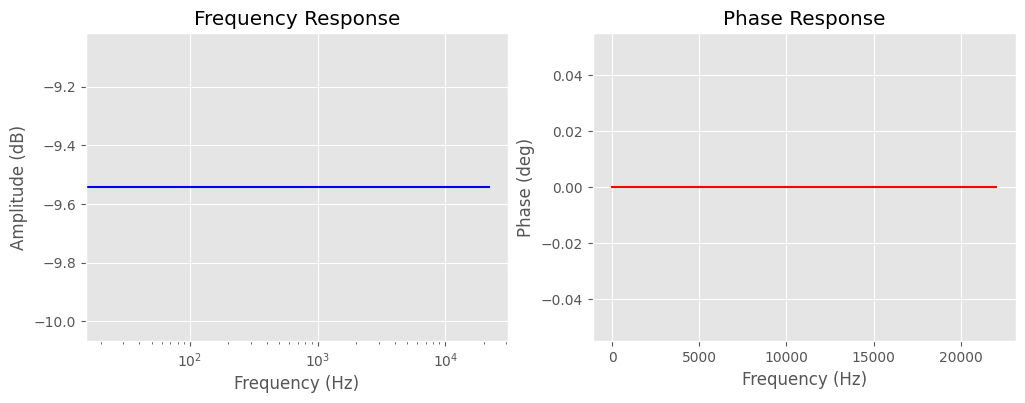

In [ ]:
## using fft from scipy

sampleRate = 44100
spectrum = fft(impulseResponse)

x = np.linspace(0, spectrum.size * sampleRate / frameSize / 2 , spectrum.size//2)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
with np.errstate(divide='ignore'):
    y = (20 * np.log10(np.abs(spectrum)))[:spectrum.size//2]
ax.plot(x, y, 'b')
ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_title("Frequency Response")

ax = axes[1]
y = np.degrees(np.angle(spectrum))[:spectrum.size//2]
ax.plot(x, y, 'r')
#ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (deg)')
ax.set_title("Phase Response")

plt.show()